<a href="https://colab.research.google.com/github/sushmana/Crypto-Lab/blob/master/Music_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Music recommendation System

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import Recommenders as Recommenders
from sklearn.model_selection import train_test_split
import time
import joblib
import Evaluation as Evaluation

In [ ]:
# importing modules
import requests, json
import urllib.parse
# API base URL
BASE_URL = "https://api.openweathermap.org/data/2.5/weather?"

# City Name
CITY = "New Delhi"

# Your API key
API_KEY = "67c92bc41548d686bf46131d3f0fa3bd"

# updating the URL
URL = BASE_URL + "q=" + urllib.parse.quote(CITY) + "&appid=" + API_KEY
# Sending HTTP request
response = requests.get(URL)

# checking the status code of the request
if response.status_code == 200:
    
   # retrieving data in the json format
   data = response.json()
   
   # take the main dict block
   main = data['main']
   
   # getting temperature
   temperature = main['temp']
   # getting feel like
   temp_feel_like = main['feels_like']  
   # getting the humidity
   humidity = main['humidity']
   # getting the pressure
   pressure = main['pressure']
   
   # weather report
   weather_report = data['weather']
   # wind report
   wind_report = data['wind']
   
   print(f"{CITY:-^35}")
   print(f"City ID: {data['id']}")   
   print(f"Temperature: {temperature}")
   print(f"Feel Like: {temp_feel_like}")  
   print(f"Humidity: {humidity}")
   print(f"Pressure: {pressure}")
   print(f"Weather Report: {weather_report[0]['description']}")
   print(f"Wind Speed: {wind_report['speed']}")
   print(f"Time Zone: {data['timezone']}")
else:
   # showing the error message
   print("Error in the HTTP request")

-------------New Delhi-------------
City ID: 1261481
Temperature: 292.24
Feel Like: 290.99
Humidity: 30
Pressure: 1017
Weather Report: smoke
Wind Speed: 2.06
Time Zone: 19800


In [ ]:
import csv
import random
from csv import writer
from csv import reader
default_text = 'Some Text'
# Open the input_file in read mode and output_file in write mode
with open('song_data.csv', 'r',encoding='utf-8') as read_obj, \
        open('output_data.csv', 'w', newline='',encoding='utf-8') as write_obj:
    # Create a csv.reader object from the input file object
    csv_reader = reader(read_obj)
    # Create a csv.writer object from the output file object
    csv_writer = writer(write_obj)
    # Read each row of the input csv file as list
    for row in csv_reader:
        r=random.randint(273,310) # Temperature in Fahrenheit
        # Append the default text in the row / list
        row.append(r)
        # Add the updated row / list to the output file
        csv_writer.writerow(row) 

# Load music data

In [ ]:
#Read userid-songid-listen_count triplets
triplets_file = '10000.txt'
songs_metadata_file = 'output_data.csv'

song_df_1 = pd.read_table(triplets_file,header=None)
song_df_1.columns = ['user_id', 'song_id', 'listen_count']
print(song_df_1.head())
#Read song  metadata
song_df_2 =  pd.read_csv(songs_metadata_file)
song_df_2.columns = ['song_id', 'title','release','artist_name','year','temperature']
print(song_df_2.head())
#Merge the two dataframes above to create input dataframe for recommender systems
song_df = pd.merge(song_df_1, song_df_2.drop_duplicates(['song_id']), on="song_id", how="left") 
song_df.head()

                                    user_id             song_id  listen_count
0  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOAKIMP12A8C130995             1
1  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBBMDR12A8C13253B             2
2  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBXHDL12A81C204C0             1
3  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBYHAJ12A6701BF1D             1
4  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SODACBL12A8C13C273             1
              song_id              title  \
0  SOQMMHC12AB0180CB8       Silent Night   
1  SOVFVAK12A8C1350D9        Tanssi vaan   
2  SOGTUKN12AB017F4F1  No One Could Ever   
3  SOBNYVR12A8C13558C      Si Vos Querés   
4  SOHSBXH12A8C13B0DF   Tangle Of Aspens   

                                release       artist_name  year  temperature  
0                 Monster Ballads X-Mas  Faster Pussy cat  2003          294  
1                           Karkuteillä  Karkkiautomaatti  1995          291  
2                             

,user_id,song_id,listen_count,title,release,artist_name,year,temperature
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0,308
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976,298
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007,300
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005,307
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,284


# Explore data

Music data shows how many times a user listened to a song, as well as the details of the song.

In [ ]:
song_df.head()

,user_id,song_id,listen_count,title,release,artist_name,year,temperature
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0,308
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976,298
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007,300
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005,307
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,284


## Length of the dataset

In [ ]:
len(song_df)

2000000

## Create a subset of the dataset

In [ ]:
song_df = song_df.head(10000)

#Merge song title and artist_name columns to make a merged column
song_df['song'] = song_df['title'].map(str) + " - " + song_df['artist_name']
song_df['song'].head()

0            The Cove - Jack Johnson
1    Entre Dos Aguas - Paco De Lucia
2              Stronger - Kanye West
3      Constellations - Jack Johnson
4        Learn To Fly - Foo Fighters
Name: song, dtype: object

## Showing the most popular songs in the dataset

In [ ]:
song_grouped = song_df.groupby(['song']).agg({'listen_count': 'count'}).reset_index()
grouped_sum = song_grouped['listen_count'].sum()
song_grouped['percentage']  = song_grouped['listen_count'].div(grouped_sum)*100
song_grouped.sort_values(['listen_count', 'song'], ascending = [0,1])

,song,listen_count,percentage
3660,Sehr kosmisch - Harmonia,45,0.45
4678,Undo - Björk,32,0.32
5105,You're The One - Dwight Yoakam,32,0.32
1071,Dog Days Are Over (Radio Edit) - Florence + Th...,28,0.28
3655,Secrets - OneRepublic,28,0.28
...,...,...,...
5139,high fives - Four Tet,1,0.01
5140,in white rooms - Booka Shade,1,0.01
5143,paranoid android - Christopher O'Riley,1,0.01
5149,¿Lo Ves? [Piano Y Voz] - Alejandro Sanz,1,0.01


## Count number of unique users in the dataset

In [ ]:
users = song_df['user_id'].unique()
print(users)

['b80344d063b5ccb3212f76538f3d9e43d87dca9e'
 '85c1f87fea955d09b4bec2e36aee110927aedf9a'
 'bd4c6e843f00bd476847fb75c47b4fb430a06856'
 '8937134734f869debcab8f23d77465b4caaa85df'
 '969cc6fb74e076a68e36a04409cb9d3765757508'
 '4bd88bfb25263a75bbdd467e74018f4ae570e5df'
 'e006b1a48f466bf59feefed32bec6494495a4436'
 '9d6f0ead607ac2a6c2460e4d14fb439a146b7dec'
 '9bb911319fbc04f01755814cb5edb21df3d1a336'
 'b64cdd1a0bd907e5e00b39e345194768e330d652'
 '17aa9f6dbdf753831da8f38c71b66b64373de613'
 'd6589314c0a9bcbca4fee0c93b14bc402363afea'
 '5a905f000fc1ff3df7ca807d57edb608863db05d'
 'c737ec8c1b16ce8e39115f4432c9a7fc21ec47a1'
 '45544491ccfcdc0b0803c34f201a6287ed4e30f8'
 'ed7d4c476013b1c3dd91982b61494bf7436083ba'
 'baf47ed8da24d607e50d8684cde78b923538640f'
 '169f9f4c68b62d1887c7c0ac99d10a79cfca5daf'
 'a820d2d4f16bbd53be9e41e0417dfb234bfdfba8'
 'bd8475385f0aa78830fa6dfce9e7242164b035c8'
 '0afaa5d9d04bf85af720fe8cc566a41ca3e41c97'
 '81bde1c3a845c64f1677bd9d28f2da85dfefcf30'
 '403b3b867fc71dfdcc12652f30e88b

In [ ]:
len(users)

365

## Count the number of unique songs in the dataset

In [ ]:
###Fill in the code here
songs = song_df['song'].unique()
len(songs)

5151

# Create a song recommender

In [ ]:
train_data, test_data = train_test_split(song_df, test_size = 0.20, random_state=0)
print(train_data.head(5))
print("\n\nTest")
print(test_data.head(5))

                                       user_id             song_id  \
7389  94d5bdc37683950e90c56c9b32721edb5d347600  SOXNZOW12AB017F756   
9275  1012ecfd277b96487ed8357d02fa8326b13696a5  SOXHYVQ12AB0187949   
2995  15415fa2745b344bce958967c346f2a89f792f63  SOOSZAZ12A6D4FADF8   
5316  ffadf9297a99945c0513cd87939d91d8b602936b  SOWDJEJ12A8C1339FE   
356   5a905f000fc1ff3df7ca807d57edb608863db05d  SOAMPRJ12A8AE45F38   

      listen_count                 title  \
7389             2      Half Of My Heart   
9275             1  The Beautiful People   
2995             1     Sanctify Yourself   
5316             4     Heart Cooks Brain   
356             20                 Rorol   

                                                release      artist_name  \
7389                                     Battle Studies       John Mayer   
9275             Antichrist Superstar (Ecopac Explicit)   Marilyn Manson   
2995                             Glittering Prize 81/92     Simple Minds   
5316  Ever

## Simple popularity-based recommender class 

In [ ]:
#Recommenders.popularity_recommender_py

### Create an instance of popularity based recommender class

In [ ]:
pm = Recommenders.popularity_recommender_py()
pm.create(train_data, 'user_id', 'song')

### Use the popularity model to make some predictions

In [ ]:
user_id = users[5]
pm.recommend(user_id)

,user_id,song,score,Rank
3194,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Sehr kosmisch - Harmonia,37,1.0
4083,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Undo - Björk,27,2.0
931,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Dog Days Are Over (Radio Edit) - Florence + Th...,24,3.0
4443,4bd88bfb25263a75bbdd467e74018f4ae570e5df,You're The One - Dwight Yoakam,24,4.0
3034,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Revelry - Kings Of Leon,21,5.0
3189,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Secrets - OneRepublic,21,6.0
4112,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Use Somebody - Kings Of Leon,21,7.0
1207,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Fireflies - Charttraxx Karaoke,20,8.0
1577,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Hey_ Soul Sister - Train,19,9.0
1626,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Horn Concerto No. 4 in E flat K495: II. Romanc...,19,10.0


###  Use the popularity based model to make predictions for the following user id (Note the difference in recommendations from the first user id).

In [ ]:
###Fill in the code here
user_id = users[8]
pm.recommend(user_id)


,user_id,song,score,Rank
3194,9bb911319fbc04f01755814cb5edb21df3d1a336,Sehr kosmisch - Harmonia,37,1.0
4083,9bb911319fbc04f01755814cb5edb21df3d1a336,Undo - Björk,27,2.0
931,9bb911319fbc04f01755814cb5edb21df3d1a336,Dog Days Are Over (Radio Edit) - Florence + Th...,24,3.0
4443,9bb911319fbc04f01755814cb5edb21df3d1a336,You're The One - Dwight Yoakam,24,4.0
3034,9bb911319fbc04f01755814cb5edb21df3d1a336,Revelry - Kings Of Leon,21,5.0
3189,9bb911319fbc04f01755814cb5edb21df3d1a336,Secrets - OneRepublic,21,6.0
4112,9bb911319fbc04f01755814cb5edb21df3d1a336,Use Somebody - Kings Of Leon,21,7.0
1207,9bb911319fbc04f01755814cb5edb21df3d1a336,Fireflies - Charttraxx Karaoke,20,8.0
1577,9bb911319fbc04f01755814cb5edb21df3d1a336,Hey_ Soul Sister - Train,19,9.0
1626,9bb911319fbc04f01755814cb5edb21df3d1a336,Horn Concerto No. 4 in E flat K495: II. Romanc...,19,10.0


## Build a song recommender with personalization

We now create an item similarity based collaborative filtering model that allows us to make personalized recommendations to each user. 

## Class for an item similarity based personalized recommender system 

In [ ]:
#Recommenders.item_similarity_recommender_py

### Create an instance of item similarity based recommender class

In [ ]:
is_model = Recommenders.item_similarity_recommender_py()
is_model.create(train_data, 'user_id', 'song')

### Use the personalized model to make some song recommendations

In [ ]:
#Print the songs for the user in training data
user_id = users[5]
user_items = is_model.get_user_items(user_id)
#
print("------------------------------------------------------------------------------------")
print("Training data songs for the user userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend songs for the user using personalized model
is_model.recommend(user_id)

------------------------------------------------------------------------------------
Training data songs for the user userid: 4bd88bfb25263a75bbdd467e74018f4ae570e5df:
------------------------------------------------------------------------------------
Just Lose It - Eminem
Without Me - Eminem
16 Candles - The Crests
Speechless - Lady GaGa
Push It - Salt-N-Pepa
Ghosts 'n' Stuff (Original Instrumental Mix) - Deadmau5
Say My Name - Destiny's Child
My Dad's Gone Crazy - Eminem / Hailie Jade
The Real Slim Shady - Eminem
Somebody To Love - Justin Bieber
Forgive Me - Leona Lewis
Missing You - John Waite
Ya Nada Queda - Kudai
----------------------------------------------------------------------
Recommendation process going on:
----------------------------------------------------------------------
No. of unique songs for the user: 13
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :2097


,user_id,song,score,rank
0,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Superman - Eminem / Dina Rae,0.088692,1
1,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Mockingbird - Eminem,0.067663,2
2,4bd88bfb25263a75bbdd467e74018f4ae570e5df,I'm Back - Eminem,0.065385,3
3,4bd88bfb25263a75bbdd467e74018f4ae570e5df,U Smile - Justin Bieber,0.064525,4
4,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Here Without You - 3 Doors Down,0.062293,5
5,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Hellbound - J-Black & Masta Ace,0.055769,6
6,4bd88bfb25263a75bbdd467e74018f4ae570e5df,The Seed (2.0) - The Roots / Cody Chestnutt,0.052564,7
7,4bd88bfb25263a75bbdd467e74018f4ae570e5df,I'm The One Who Understands (Edit Version) - War,0.052564,8
8,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Falling - Iration,0.052564,9
9,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Armed And Ready (2009 Digital Remaster) - The ...,0.052564,10


### Use the personalized model to make some song recommendations

In [ ]:
user_id = users[7]
#Fill in the code here
user_items = is_model.get_user_items(user_id)
#
print("------------------------------------------------------------------------------------")
print("Training data songs for the user userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend songs for the user using personalized model
is_model.recommend(user_id)

------------------------------------------------------------------------------------
Training data songs for the user userid: 9d6f0ead607ac2a6c2460e4d14fb439a146b7dec:
------------------------------------------------------------------------------------
Swallowed In The Sea - Coldplay
Life In Technicolor ii - Coldplay
Life In Technicolor - Coldplay
The Scientist - Coldplay
Trouble - Coldplay
Strawberry Swing - Coldplay
Lost! - Coldplay
Clocks - Coldplay
----------------------------------------------------------------------
Recommendation process going on:
----------------------------------------------------------------------
No. of unique songs for the user: 8
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :3429


,user_id,song,score,rank
0,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,She Just Likes To Fight - Four Tet,0.281579,1
1,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,Warning Sign - Coldplay,0.281579,2
2,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,We Never Change - Coldplay,0.281579,3
3,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,Puppetmad - Puppetmastaz,0.281579,4
4,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,God Put A Smile Upon Your Face - Coldplay,0.281579,5
5,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,Susie Q - Creedence Clearwater Revival,0.281579,6
6,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,The Joker - Fatboy Slim,0.281579,7
7,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,Korg Rhythm Afro - Holy Fuck,0.281579,8
8,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,This Unfolds - Four Tet,0.281579,9
9,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,high fives - Four Tet,0.281579,10


## We can also apply the model to find similar songs to any song in the dataset

In [ ]:
df_rec = is_model.get_similar_items(['Puppetmad - Puppetmastaz'])

no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :324


In [ ]:
df_rec

,user_id,song,score,rank
0,,She Just Likes To Fight - Four Tet,1.0,1
1,,Warning Sign - Coldplay,1.0,2
2,,Puppetmad - Puppetmastaz,1.0,3
3,,God Put A Smile Upon Your Face - Coldplay,1.0,4
4,,Susie Q - Creedence Clearwater Revival,1.0,5
5,,The Joker - Fatboy Slim,1.0,6
6,,Korg Rhythm Afro - Holy Fuck,1.0,7
7,,This Unfolds - Four Tet,1.0,8
8,,high fives - Four Tet,1.0,9
9,,Camel - Flying Lotus,1.0,10


In [ ]:
song_df

,user_id,song_id,listen_count,title,release,artist_name,year,temperature,song
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0,308,The Cove - Jack Johnson
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976,298,Entre Dos Aguas - Paco De Lucia
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007,300,Stronger - Kanye West
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005,307,Constellations - Jack Johnson
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,284,Learn To Fly - Foo Fighters
...,...,...,...,...,...,...,...,...,...
9995,15cc706a7f24975ca831aaaf297bf0392746b3fe,SOFSETB12A8C134038,2,Show Me How To Live,Audioslave,Audioslave,2002,300,Show Me How To Live - Audioslave
9996,15cc706a7f24975ca831aaaf297bf0392746b3fe,SOHIROU12AB01852AF,5,Billy Liar,Billy Liar (CD-Single),The Decemberists,2003,298,Billy Liar - The Decemberists
9997,15cc706a7f24975ca831aaaf297bf0392746b3fe,SOOAVGC12AB01821EC,5,The Bachelor and the Bride,Her Majesty The Decemberists,The Decemberists,2003,292,The Bachelor and the Bride - The Decemberists
9998,15cc706a7f24975ca831aaaf297bf0392746b3fe,SOPKEIV12AB018220D,5,Red Right Ankle,Her Majesty The Decemberists,The Decemberists,2003,283,Red Right Ankle - The Decemberists


In [ ]:
song_df[song_df['song']=='She Just Likes To Fight - Four Tet']

,user_id,song_id,listen_count,title,release,artist_name,year,temperature,song
705,5a905f000fc1ff3df7ca807d57edb608863db05d,SOWNVRT12AB0188CA6,1,She Just Likes To Fight,There Is Love In You,Four Tet,2010,293,She Just Likes To Fight - Four Tet


In [ ]:
# importing modules
import requests, json
import urllib.parse
# API base URL
BASE_URL = "https://api.openweathermap.org/data/2.5/weather?"

# City Name
CITY = "New Delhi"

# Your API key
API_KEY = "67c92bc41548d686bf46131d3f0fa3bd"

# updating the URL
URL = BASE_URL + "q=" + urllib.parse.quote(CITY) + "&appid=" + API_KEY
# Sending HTTP request
response = requests.get(URL)

# checking the status code of the request
if response.status_code == 200:
   data = response.json()
   main = data['main']
   temperature = main['temp']
   temp_feel_like = main['feels_like']  
   humidity = main['humidity']
   pressure = main['pressure']
   weather_report = data['weather']
   wind_report = data['wind']
else:
   # showing the error message
   print("Error in the HTTP request")

df_f = pd.DataFrame(columns=[])

for i in df_rec['song']:
    df_f = df_f.append(song_df[song_df['song']==i])

#Recommendation on the basis of Temperature
print(temperature)
df_f['dist'] = df_f['temperature'].apply(lambda x: abs(temperature-x))    
df_f.sort_values(by=['dist'], ascending=True).head()

292.24


,user_id,song_id,listen_count,title,release,artist_name,year,temperature,song,dist
705,5a905f000fc1ff3df7ca807d57edb608863db05d,SOWNVRT12AB0188CA6,1,She Just Likes To Fight,There Is Love In You,Four Tet,2010,293,She Just Likes To Fight - Four Tet,0.76
537,5a905f000fc1ff3df7ca807d57edb608863db05d,SOMJFPG12A58A7DD95,2,Warning Sign,A Rush Of Blood To The Head,Coldplay,2002,290,Warning Sign - Coldplay,2.24
387,5a905f000fc1ff3df7ca807d57edb608863db05d,SOCJHXN12AB0188C8B,2,This Unfolds,There Is Love In You,Four Tet,2010,295,This Unfolds - Four Tet,2.76
375,5a905f000fc1ff3df7ca807d57edb608863db05d,SOBOJJB12A58A7D1AD,3,Korg Rhythm Afro,Holy Fuck,Holy Fuck,2005,297,Korg Rhythm Afro - Holy Fuck,4.76
595,5a905f000fc1ff3df7ca807d57edb608863db05d,SOPUUQJ12AF72A5748,2,Susie Q,Creedence Gold,Creedence Clearwater Revival,1979,298,Susie Q - Creedence Clearwater Revival,5.76


# Quantitative comparison between the models
## We now formally compare the popularity and the personalized models using precision-recall curves.


## Class to calculate precision and recall

#Evaluation.precision_recall_calculator

## Use the above precision recall calculator class to calculate the evaluation measures

In [ ]:
start = time.time()

#Define what percentage of users to use for precision recall calculation
user_sample = 0.05

#Instantiate the precision_recall_calculator class
pr = Evaluation.precision_recall_calculator(test_data, train_data, pm, is_model)

#Call method to calculate precision and recall values
(pm_avg_precision_list, pm_avg_recall_list, ism_avg_precision_list, ism_avg_recall_list) = pr.calculate_measures(user_sample)

end = time.time()
print(end - start)

Length of user_test_and_training:319
Length of user sample:15
Getting recommendations for user:66166f4f57bb897f1f8e2aae6f53f776088f43d8
No. of unique songs for the user: 7
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :195
Getting recommendations for user:45544491ccfcdc0b0803c34f201a6287ed4e30f8
No. of unique songs for the user: 3
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :19
Getting recommendations for user:9bb911319fbc04f01755814cb5edb21df3d1a336
No. of unique songs for the user: 4
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :16
Getting recommendations for user:39eb6b6dc155f96203daa8bc9cd7ea55dc25a7fd
No. of unique songs for the user: 4
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :100
Getting recommendations for user:66a0167a7c636b06efc39953aca127667beea260
No. of unique songs for the user: 13
no. of unique songs in the traini

## Code to plot precision recall curve

In [ ]:
import pylab as pl

#Method to generate precision and recall curve
def plot_precision_recall(m1_precision_list, m1_recall_list, m1_label, m2_precision_list, m2_recall_list, m2_label):
    pl.clf()    
    pl.plot(m1_recall_list, m1_precision_list, label=m1_label)
    pl.plot(m2_recall_list, m2_precision_list, label=m2_label)
    pl.xlabel('Recall')
    pl.ylabel('Precision')
    pl.ylim([0.0, 0.20])
    pl.xlim([0.0, 0.20])
    pl.title('Precision-Recall curve')
    #pl.legend(loc="upper right")
    pl.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
    pl.show()


Plotting precision recall curves.


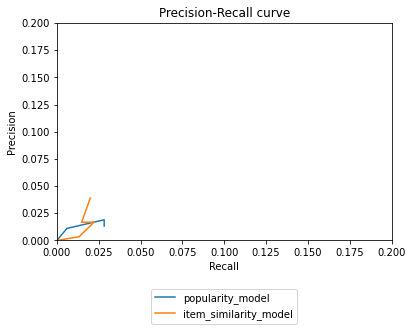

In [ ]:
print("Plotting precision recall curves.")

plot_precision_recall(pm_avg_precision_list, pm_avg_recall_list, "popularity_model",
                      ism_avg_precision_list, ism_avg_recall_list, "item_similarity_model")


### Generate Precision Recall curve using pickled results on a larger data subset

Plotting precision recall curves for a larger subset of data (100,000 rows) (user sample = 0.005).
Plotting precision recall curves.


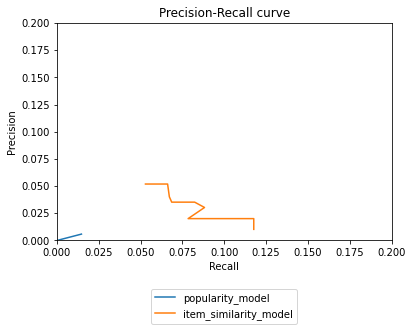

In [ ]:
print("Plotting precision recall curves for a larger subset of data (100,000 rows) (user sample = 0.005).")

#Read the persisted files 
pm_avg_precision_list = joblib.load('pm_avg_precision_list_3.pkl')
pm_avg_recall_list = joblib.load('pm_avg_recall_list_3.pkl')
ism_avg_precision_list = joblib.load('ism_avg_precision_list_3.pkl')
ism_avg_recall_list = joblib.load('ism_avg_recall_list_3.pkl')

print("Plotting precision recall curves.")
plot_precision_recall(pm_avg_precision_list, pm_avg_recall_list, "popularity_model",
                      ism_avg_precision_list, ism_avg_recall_list, "item_similarity_model")

The curve shows that the personalized model provides much better performance over the popularity model. 